# Motion of a planet in gravitational central field

## Central field

$$\vec{F} = -G\frac{Mm}{r^2} \hat{r} , \quad \hat{r} = \frac{\vec{r}}{|r|}$$

$$m\frac{d^2\vec{r}}{dt^2} = - G\frac{Mm}{r^3}\vec{r}$$

$$\left\{\begin{eqnarray}
\frac{d\vec{r}}{dt} & = & \vec{v} \\
m\frac{d\vec{v}}{dt} & = & -G \frac{Mm}{r^3} \vec{r}
\end{eqnarray}\right.$$

## Perturbation

Adding a $\frac{1}{r^3}$ perturbation to the gravitational field results in open orbit!

$$\vec{F}_{\mathrm{pert}} = \left[ -G\frac{Mm}{r^2} - \frac{\alpha}{r^3} \right] \hat{r} $$

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [192]:
def centralfield_dt(X,t,K):
    x,y,z,vx,vy,vz = X
    r = np.sqrt(x**2+y**2+z**2)
    return vx,vy,vz,-K*x/r**3,-K*y/r**3,-K*z/r**3

In [193]:
def centralfield_pert_dt(X,t,K,alpha=0):
    x,y,z,vx,vy,vz = X
    r = np.sqrt(x**2+y**2+z**2)
    return vx,vy,vz,-K*x/r**3-alpha*x/r**4,-K*y/r**3-alpha*y/r**4,-K*z/r**3-alpha*z/r**4

In [194]:
G = 6.6742E-11 # m3 kg-1 s-2 Gravitational constant
M = 1.98844E30 # kg Sun mass
r0 = 147098074 # m Sun-Earth distance at perielion
v0 = 30.287    # m/s Earth speed at perielion

In [195]:
K = G*M/1_000_000_000 # rescale G to km3 kg-1 s-2

In [196]:
v0x = 0
v0y = v0

x0 = r0
y0 = 0
X0 = [ x0, y0, 0, v0x, v0y, 0 ]

In [313]:
tmax = 3600*24*365 # seconds in a year
dt   = 60*60*24    # seconds in a day
t = np.arange(0, tmax+dt, dt)

In [314]:
X = odeint(centralfield_dt, X0, t, args=(K,))

In [315]:
# alpha/r3 perturbation to gravitational force 
alpha = K*r0/2
Xp = odeint(centralfield_pert_dt, X0, t, args=(K,alpha))

In [316]:
x,y,z = X[:,0], X[:,1], X[:,2]
xp,yp,zp = Xp[:,0], Xp[:,1], Xp[:,2]

Text(0, 0.5, 'y [km]')

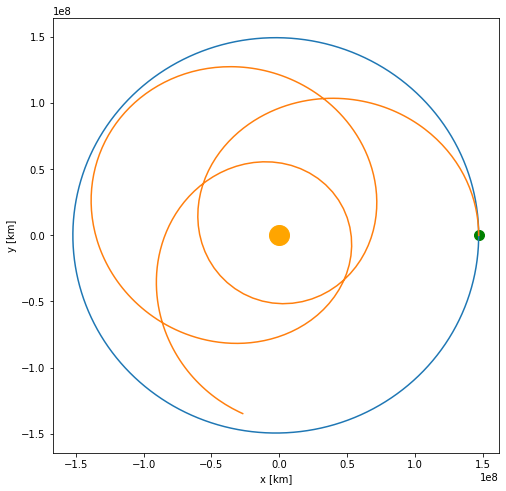

In [317]:
fig = plt.figure(figsize=(8, 8), dpi=72)
ax = fig.add_subplot(111)
plt.plot(x0,y0,"o",markersize=10,color="green")
plt.plot(0.,0.,"o",markersize=20,color="orange")
plt.plot(x,y)
plt.plot(xp,yp)
plt.xlabel('x [km]')
plt.ylabel('y [km]')

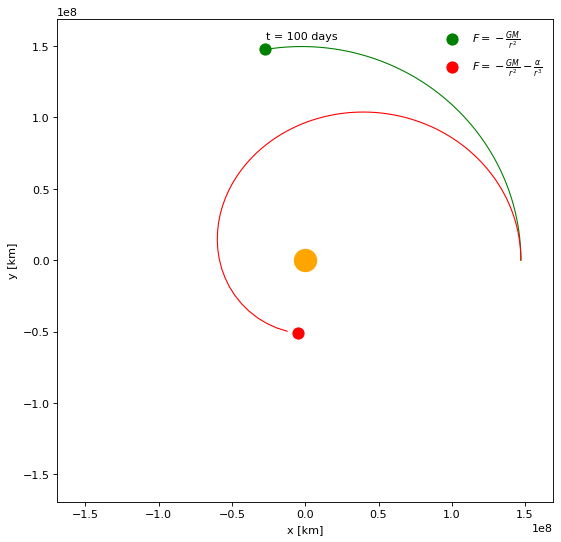

In [318]:
i = 100

fig, ax = plt.subplots(figsize=(8,8),dpi=80)
plt.plot(0.,0.,"o",markersize=20,color="orange")
plt.plot(x[:i],y[:i],"-",linewidth=1,color='green')
plt.plot(x[i],y[i],"o",markersize=10,color='green',label=r"$F=-\frac{GM}{r^2}$")
plt.plot(xp[:i],yp[:i],"-",linewidth=1,color='red')
plt.plot(xp[i],yp[i],"o",markersize=10,color='red',label=r"$F=-\frac{GM}{r^2} - \frac{\alpha}{r^3}$")
plt.text(0.-r0*0.18,r0*1.05, r't = {:d} days'.format( int(t[i]//dt) ))
plt.xlim([-1.15*r0,1.15*r0])
plt.ylim([-1.15*r0,1.15*r0])
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend(loc='best',frameon=False)
plt.show()

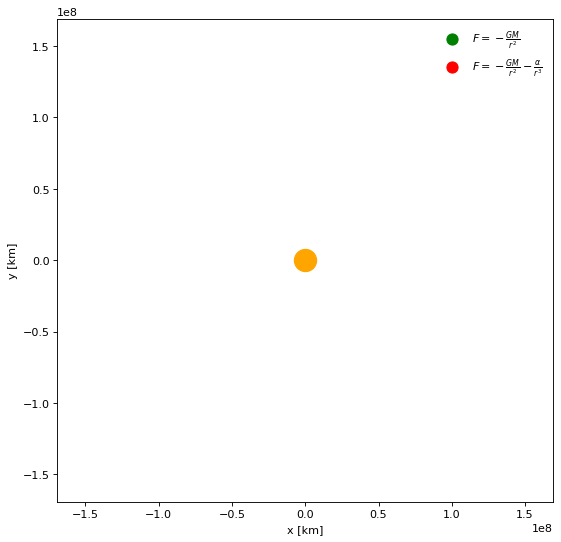

In [319]:
fig, ax = plt.subplots(figsize=(8,8),dpi=80)
plt.plot(0.,0.,"o",markersize=20,color="orange")
l1, = plt.plot([],[],"-",linewidth=1,color='green')
p1, = plt.plot([],[],"o",markersize=10,color='green',label=r"$F=-\frac{GM}{r^2}$")
l2, = plt.plot([],[],"-",linewidth=1,color='red')
p2, = plt.plot([],[],"o",markersize=10,color='red',label=r"$F=-\frac{GM}{r^2} - \frac{\alpha}{r^3}$")
time = plt.text(0.-r0*0.18,r0*1.05, "")
plt.xlim([-1.15*r0,1.15*r0])
plt.ylim([-1.15*r0,1.15*r0])
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend(loc='best',frameon=False)
plt.show()

In [320]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def planets_init():
    l1.set_data([],[])
    p1.set_data([],[])
    l2.set_data([],[])
    p2.set_data([],[])
    time.set_text("")
    return (l1,)

def planets_animate(i):
    l1.set_data(x[:i],y[:i])
    p1.set_data(x[i],y[i])
    l2.set_data(xp[:i],yp[:i])
    p2.set_data(xp[i],yp[i])
    time.set_text(r't = {:d} days'.format(t[i]//(3600*24)))
    return (l1,)

anim = FuncAnimation(fig,planets_animate,frames=range(len(t)),init_func=planets_init,blit=True)

In [321]:
HTML(anim.to_html5_video())

In [322]:
anim.save('movies/planet_pert.mp4', writer=FFMpegWriter(fps=20))

In [323]:
anim.save('gifs/planet_pert.gif', writer=FFMpegWriter(fps=20))

In [324]:
Image(url='gifs/planet_pert.gif')